# Projekt

### Konfiguracja

In [49]:
from plot_tool import *
from visibility_graph import *
import numpy as np
import sys

[sys.version, np.__version__]


['3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]',
 '1.20.1']

### Miotła robi brrr

In [50]:
def visibility_graph_scenes(figures, vg):
    figures_lines_collections = [LinesCollection([[(figure.points[i - 1].x, figure.points[i - 1].y), (figure.points[i].x, figure.points[i].y)]
                                                  for i in range(len(figure.points))], color="tab:red", linestyle="dotted", zorder=0, linewidth=2.0) for figure in figures]

    points_collection = PointsCollection(vg.get_points(), color="tab:purple", zorder=2, marker=".")
    lines_collection = LinesCollection(vg.get_lines(), color="tab:blue", zorder=1, linewidth=0.6)

    return [ Scene([points_collection], [lines_collection]) , Scene([points_collection], figures_lines_collections + [lines_collection]) ]


def visibility_graph_scenes_separately(figures, vg):
    figures_lines_collections = [LinesCollection([[(figure.points[i - 1].x, figure.points[i - 1].y), (figure.points[i].x, figure.points[i].y)]
                                                  for i in range(len(figure.points))], color="tab:red", linestyle="dotted", zorder=0, linewidth=2.0) for figure in figures]

    points_collection = PointsCollection(vg.get_points(), color="tab:purple", zorder=2, marker=".")
    scenes = [Scene([points_collection], figures_lines_collections + [LinesCollection(lines, color="tab:blue", zorder=1, linewidth=1)]) for lines in vg.get_lines_separately()]

    return scenes


### Testy

In [51]:
# f1 = Figure([Point(0, -3), Point(2, 2), Point(1.5, -4)])                # niebieski
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 8)])                   # czerwony
# f2 = Figure([Point(6, -2), Point(2, 6), Point(4, 12), Point(4, 8)])
f3 = Figure([Point(3, -7), Point(4.5, -3), Point(6, -6)])               # zielony

f4 = Figure([Point(7, 0), Point(9, 0), Point(8, -2)])       # żółty
f5 = Figure([Point(10, -2), Point(11, -2), Point(10, 0)])   # limonkowy
f6 = Figure([Point(10, 1), Point(11, 2), Point(11, 0)])     # fioletowy

F = [f3, f4, f5, f6]
# F = [Figure([Point(0.4, 0.4), Point(0.4458874458874459, 0.23160173160173161), Point(0.5367965367965367, 0.34199134199134207)]), Figure([Point(0.6, 0.6), Point(0.5443722943722944, 0.7380952380952381), Point(0.461038961038961, 0.6525974025974026)]), Figure([Point(0.2911255411255411, 0.6028138528138529), Point(0.7857142857142857, 0.524891774891775), Point(0.7575757575757576, 0.37770562770562777)])]

<IPython.core.display.Javascript object>


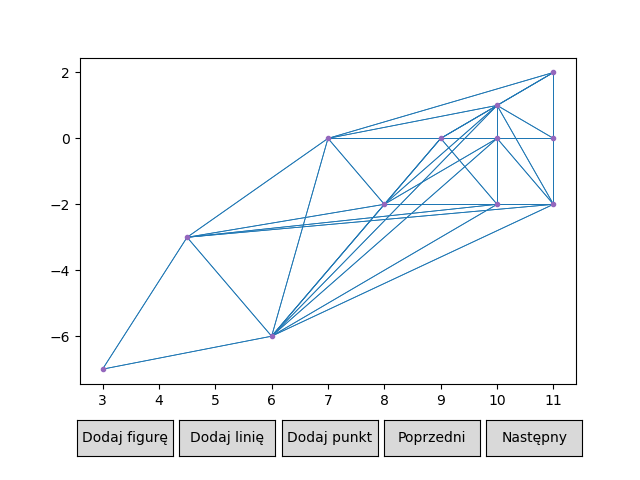

In [52]:
%matplotlib notebook

plot2 = Plot(visibility_graph_scenes(F, visibility_graph(F)))
plot2.draw()

<IPython.core.display.Javascript object>


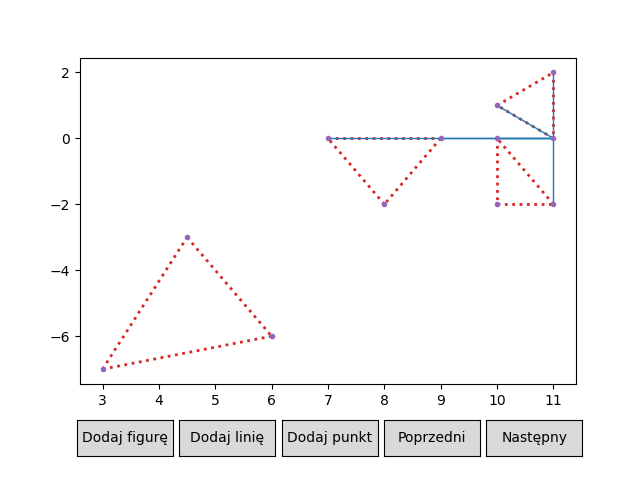

In [53]:
%matplotlib notebook

plot3 = Plot(visibility_graph_scenes_separately(F, visibility_graph(F)))
plot3.draw()